# CSCM45 Coursework: Object Recognition
Name: Ferit Emre Yilmaz

ID: 943804


At start, I will be doing all of my import packages that will be used on the next cells.

Also, loading the Image to jupyter, extracting features, putting them on a new matrix and Standardizing those matrices also be done in this cell.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

trn_image = np.load("trnImage.npy")
trn_label = np.load("trnLabel.npy")
tst_image = np.load("tstImage.npy")
tst_label = np.load("tstLabel.npy")

def computeFeatures(image):
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

train_data = np.zeros([trn_label.shape[0],324])
train_img = np.zeros([trn_label.shape[0],trn_image.shape[0],trn_image.shape[0]])
test_data = np.zeros([tst_label.shape[0],324])
test_img = np.zeros([tst_label.shape[0],tst_image.shape[0],tst_image.shape[0]])

for i in range(train_data.shape[0]):
    train_data[i,:],train_img[i,:,:] = computeFeatures(trn_image[:,:,:,i])
    if(i<1000):
        test_data[i,:],test_img[i,:,:] = computeFeatures(tst_image[:,:,:,i])
        
print(trn_image.shape,trn_label.shape,tst_image.shape,tst_label.shape)
print("Train feature size: ",train_data.shape,"Train hog image size: ", train_img.shape)
print("Test feature size: ",test_data.shape,"Test image size: ", test_img.shape)

normaliser = StandardScaler().fit(train_data)
train_data = normaliser.transform(train_data)
test_data = StandardScaler().fit(test_data).transform(test_data)

(32, 32, 3, 10000) (10000, 1) (32, 32, 3, 1000) (1000, 1)
Train feature size:  (10000, 324) Train hog image size:  (10000, 32, 32)
Test feature size:  (1000, 324) Test image size:  (1000, 32, 32)


# 1) Support Vector Machine - SVM
There are 4 different SVM's in this section. Each with different configuration and methods.
Confusion matrix and accuracy is printed on the bottom of the cell with respect to their order in the code itself.
In order to keep comparrision more accurate, C=1 is chosen with some trial and error. The second candidate for the C value was 0.4

<b>1_)</b> In first and second method, <i>svm1,svm2</i>, we fed our data to a Linear Discriminant Analysis in order to reduce its dimensionality. After some trial and error, it is found out that 4 dimensions is the optimum value for this. As a solver, we have used <b>'poly'</b> and Radial Basis Function <b>'rbf'</b> respectively to figure out which one works better. Also with some trial and error, C=1 found out to be the optimum value.
    
<b>2_)</b> In the third and fourth method, <i>sv3,sv4</i>, we fed our data to our SVM without introducing LDA. Meaning; the dimension are not reduced. For solver, <b>'poly'</b> and Radial Basis Function <b>'rbf'</b> is used. C=1 in this section.

In [8]:
#---------First set of SVM-----------------------------------
current = 0
lda1 = LinearDiscriminantAnalysis(n_components = 4)
new_lda1= lda1.fit_transform(train_data,trn_label)
counter = 0
svm1 = SVC(kernel='poly', C=1).fit(new_lda1,trn_label[:,0])
predicted_labels = svm1.predict(lda1.fit_transform(test_data,tst_label))
for i in range(predicted_labels.shape[0]):
    if(predicted_labels[i]==tst_label[i]):
        counter += 1;
print("SVM1 with poly accuracy prediction is : %",counter*100/predicted_labels.shape[0])
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))

#---------Second set of SVM-----------------------------------
current = 0
lda2 = LinearDiscriminantAnalysis(n_components = 4)
new_lda2 = lda2.fit_transform(train_data,trn_label)
counter = 0
svm2 = SVC(kernel='rbf', C=1).fit(new_lda2,trn_label[:,0])
predicted_labels = svm2.predict(lda2.fit_transform(test_data,tst_label))
for i in range(predicted_labels.shape[0]):
    if(predicted_labels[i]==tst_label[i]):
        counter += 1;
print("SVM2 with rbf accuracy prediction is : %",counter*100/predicted_labels.shape[0])
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))


#---------Third set of SVM-----------------------------------
counter = 0
svm3 = SVC(kernel='poly', C=1).fit(train_data,trn_label[:,0])
predicted_labels = svm3.predict(test_data)
for i in range(predicted_labels.shape[0]):
    if(predicted_labels[i]==tst_label[i]):
        counter += 1;
print("SVM3 with poly accuracy prediction is : %",counter*100/predicted_labels.shape[0])
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))

#---------Fourth set of SVM-----------------------------------
counter = 0
svm4 = SVC(kernel='rbf', C=1).fit(train_data,trn_label[:,0])
predicted_labels = svm4.predict(test_data)
for i in range(predicted_labels.shape[0]):
    if(predicted_labels[i]==tst_label[i]):
        counter += 1;
print("SVM4 with rbf accuracy prediction is : %",counter*100/predicted_labels.shape[0])
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))


SVM1 with poly accuracy prediction is : % 51.3
And the confusion matrix for this set: 
[[70  0  3  0  6  0  0  1 18  2]
 [ 2 68  1  6  6  0  0  0 12  5]
 [ 4  0 48 10 19  8  5  4  1  1]
 [ 1  0  6 20 44  8 14  5  1  1]
 [ 1  5  2  1 31  2  3 51  0  4]
 [ 0  1 16 25  4 51  2  0  1  0]
 [ 2  3  2  3 12  4 72  2  0  0]
 [ 0  0  0  3  6 20  1 30  0 40]
 [17 12  0  0  3  0  0  0 65  3]
 [ 1 21  0  7  6  0  2  1  4 58]]
SVM2 with rbf accuracy prediction is : % 51.7
And the confusion matrix for this set: 
[[70  0  4  0  2  0  0  1 22  1]
 [ 4 77  0  1  1  0  3  0 10  4]
 [ 7  0 51  6  6 14 10  4  1  1]
 [ 3  1  6  7 24 20 24 10  1  4]
 [ 2  4  3  0 18  3  5 61  0  4]
 [ 0  1 14 14  1 65  3  0  1  1]
 [ 4  3  3  1 10  5 72  2  0  0]
 [ 0  0  0  2  2 22  1 29  0 44]
 [15 13  0  1  0  0  1  0 68  2]
 [ 1 22  0  5  2  0  3  1  6 60]]
SVM3 with poly accuracy prediction is : % 55.8
And the confusion matrix for this set: 
[[54  3  4  2 11  2  5  2 14  3]
 [ 1 65  0  0 11  0  4  1  9  9]
 [ 5  1 33  

# 2) NEURAL NETWORKS
At this section, we will be working with neural networks and configurations that might effect the output. Most of the numbers in here are the results of a period of trial and error and also researchs. So the code itself wont be repeating the trial part, it will be the optimal result of entire testing process. The reasons will be given on the report.

This sections aim to find the resulting difference of; <i>activation functions</i>,<i> optimizers</i> and effects of <i>dimensionality reduction</i>. The reason for choosing certain neuron numbers and layers will be given in the report.
    
- Activation functions are choosen to be <b> 'Sigmoid' and 'ReLu' </b>.
- Optimizers are choosen to be <b> 'sgd' and 'adam' </b>.
- Epochs are choosen between 25-100. As it turns out, more the epochs(trys) increase, it increases the overfit of the model.
- Hidden layers are either 1 or 0. Because as the hidden layers increase, the model starts to differentiate the parts that shouldnt and this causes high amount of overfitting.

<b>1_)</b> First Neural Network is a combination of LDA and NN. We first feed our data to LDA to reduce its dimensionality. Later we feed our dimensionality reducted data to our Neural Network with:
- 'sgd' as optimizer.
- 'ReLu' as activation function.

<b>2_)</b> Second Neural Network aims to duplicate the previous configuration with difference on activation function. LDA still being used.
- 'sgd' as optimizer.
- 'Sigmoid' as activation function.

<b>3_)</b> Third Neural Network aims to use of 'adam' as optimizer with 'ReLu' as activation function. LDA still being used.
- 'adam' as optimizer.
- 'ReLu' as activation function.

<b>4_)</b> Fourth Neural Network aims to use of 'adam' as optimizer with 'sigmoid' activation function. LDA still be used.
- 'adam' as optimizer.
- 'Sigmoid' as activation function.

<b>5_)</b> Fifth Neural Network aims to solve image classicafication problem with raw data(with features extracted). So we wont be using LDA in this section. Configurations are as followed;
- 'sgd' as optimizer.
- 'ReLu' as activation function.

<b>6_)</b> Sixth Neural Network aims to solve image classicafication problem with raw data(with features extracted). So we wont be using LDA in this section. Configurations are as followed;
- 'adam' as optimizer.
- 'Sigmoid' as activation function.

Artificial Neural Network prediction percent is: % 37.2
Configuration is: Optimizer = sgd, Activation Function = ReLu
And the confusion matrix for this set: 
[[58  0  5  0  6  0  0  1 29  1]
 [ 4 51  2  2  1  0 10  0 23  7]
 [14  0 39 16 13 11  4  2  0  1]
 [ 0  3 10  2 23 48  7  3  3  1]
 [ 1 11  9  2  5  3  4 60  0  5]
 [ 0  0 16 43  0 35  3  0  2  1]
 [ 2  4  0  4  7  2 80  1  0  0]
 [ 0  0  0  4  7 16  3 23  0 47]
 [48 20  0  0  0  0  1  0 25  6]
 [ 0 20  0  5  8  1  1  0 11 54]]


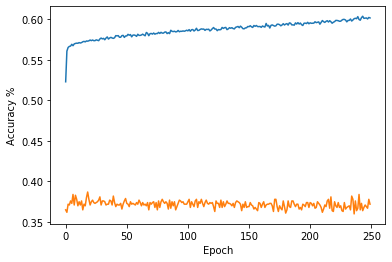

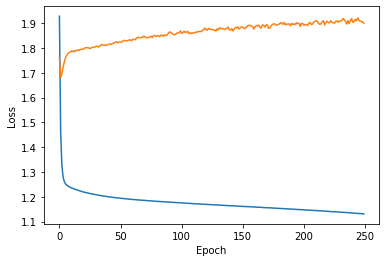

Artificial Neural Network prediction percent is: % 38.9
Configuration is: Optimizer = sgd, Activation Function = Sigmoid
And the confusion matrix for this set: 
[[10  0  8  0  2  0  0  0 80  0]
 [ 0 58  5  0  0  0  2  0 27  8]
 [ 3  1 80  4  0  0  4  5  0  3]
 [ 0 10 45  0  3 14  7 13  5  3]
 [ 0  9 14  0  0  0  1 74  0  2]
 [ 0  0 63  8  0  9  7  6  6  1]
 [ 0  6  1  0  0  0 86  6  1  0]
 [ 0  0  3  0  0  2  6 26  0 63]
 [12 18  0  0  0  0  0  0 66  4]
 [ 0 27  1  0  0  0  0  1 17 54]]


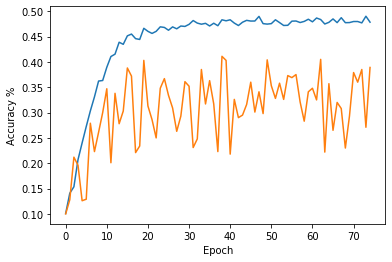

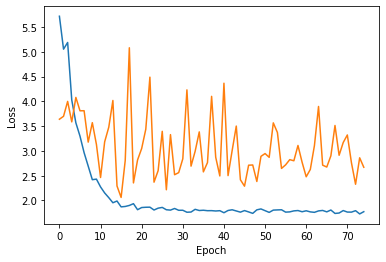

Artificial Neural Network prediction percent is: % 30.2
Configuration is: Optimizer = adam, Activation Function = ReLu
And the confusion matrix for this set: 
[[44  0  2  4  7  2  0  1 36  4]
 [ 5 34  2  9  1  2  8  1 30  8]
 [13  0 25 18 13 18  8  3  0  2]
 [ 1  1 26  4 16 28  7 13  3  1]
 [ 4  6  2  4  4  8  3 60  3  6]
 [ 0  0 16 44  1 24  7  5  2  1]
 [ 3  5  0  8  3  5 75  1  0  0]
 [ 0  0  0  7  8 15  4 17  0 49]
 [43 12  1  0  0  0  3  0 30 11]
 [ 0 24  2  9  4  1  1  3 11 45]]


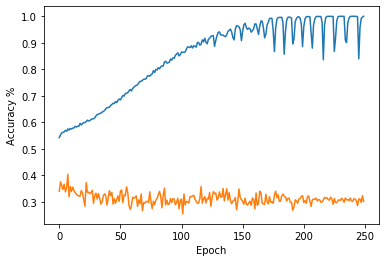

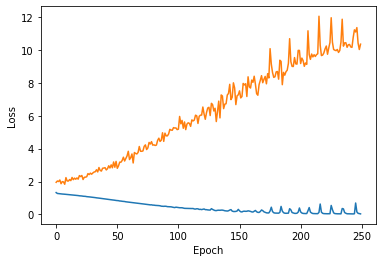

Artificial Neural Network prediction percent is: % 32.2
Configuration is: Optimizer = adam, Activation Function = Sigmoid
And the confusion matrix for this set: 
[[55  0  3  0  5  0  0  1 36  0]
 [ 5 42  4  2  0  0 10  0 32  5]
 [19  0 33 24  9  7  1  6  0  1]
 [ 2  3  4  6 21 47  6  6  4  1]
 [ 3  9  4  3  2  0  1 76  0  2]
 [ 0  0 18 60  0 13  3  3  3  0]
 [ 4  3  0 14  5  1 71  2  0  0]
 [ 0  0  0  8  8 12  2 30  0 40]
 [55 18  0  1  0  0  0  0 23  3]
 [ 0 22  0  5  9  2  1  1 13 47]]


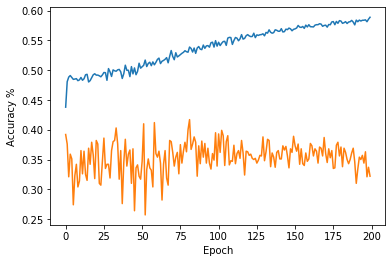

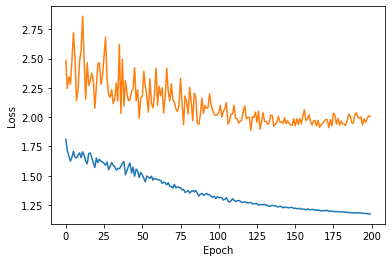

Artificial Neural Network prediction percent is: % 61.6
Configuration is: Optimizer = rbf, Activation Function = ReLu
And the confusion matrix for this set: 
[[70  1  7  3  5  1  1  4  8  0]
 [ 2 66  0  1  3  0  4  3 12  9]
 [ 9  1 42  8  5 15  9  4  5  2]
 [ 4  2 11 39 11 15  9  5  1  3]
 [ 2  1 11  5 65  7  4  2  2  1]
 [ 0  2  7  9  7 59  7  6  2  1]
 [ 1  3  9  4  7  3 70  2  1  0]
 [ 2  0  5  4  8  7  1 71  0  2]
 [11  9  5  1  1  0  2  1 63  7]
 [ 4  7  2  3  2  2  0  3  6 71]]


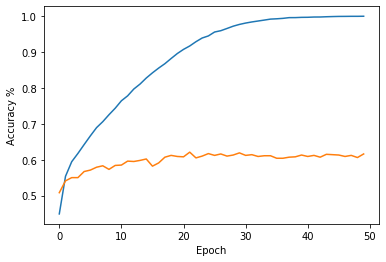

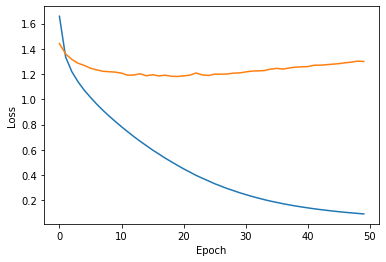

Artificial Neural Network prediction percent is: % 44.1
Configuration is: Optimizer = adam, Activation Function = sigmoid
And the confusion matrix for this set: 
[[57  1  2 14  3  0  3  0 20  0]
 [ 5 40  2 10  6  0  9  0 26  2]
 [10  1 26 29  7  8 12  0  7  0]
 [ 1  2  9 61  7  4 15  0  1  0]
 [ 3  2  8 30 38  1 13  0  5  0]
 [ 1  1  4 52  4 23 11  3  1  0]
 [ 2  1  4 26  2  0 64  0  1  0]
 [ 0  1  2 33 21  4  8 29  2  0]
 [11  3  2  3  3  0  4  0 74  0]
 [ 3  8  0 24 10  2  1  1 22 29]]


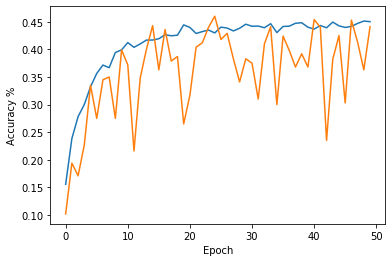

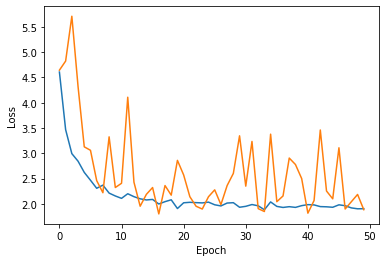

In [19]:
#-------------- First NN with LDA ----------------
current = 0
counter = 0
ldaN1 = LinearDiscriminantAnalysis(n_components = 10)
new_ldaN1= ldaN1.fit_transform(train_data,trn_label)

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(new_ldaN1.shape[1],)))
model.add(keras.layers.Dense(10000, activation=tf.nn.relu)) # first layer
model.add(keras.layers.Dense(np.max(tst_label)+1, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

new_test = ldaN1.fit_transform(test_data,tst_label)
history = model.fit(new_ldaN1, trn_label, validation_data=(new_test, tst_label), epochs=250, verbose=0)

predicted_probabilities = model.predict(new_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
for i in range(predicted_labels.size):
    if(predicted_labels[i]==tst_label[i]):
        counter+=1

print("Artificial Neural Network prediction percent is: %", (counter*100)/predicted_labels.size)
print("Configuration is: Optimizer = sgd, Activation Function = ReLu")
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
        
#-------------- Second NN with LDA ----------------

current = 0
counter = 0
ldaN1 = LinearDiscriminantAnalysis(n_components = 10)
new_ldaN1= ldaN1.fit_transform(train_data,trn_label)

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(new_ldaN1.shape[1],)))
model.add(keras.layers.Dense(10000, activation='sigmoid')) # first layer

model.add(keras.layers.Dense(np.max(tst_label)+1, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

new_test = ldaN1.fit_transform(test_data,tst_label)
history = model.fit(new_ldaN1, trn_label, validation_data=(new_test, tst_label), epochs=75, verbose=0)

predicted_probabilities = model.predict(new_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
for i in range(predicted_labels.size):
    if(predicted_labels[i]==tst_label[i]):
        counter+=1
        
print("Artificial Neural Network prediction percent is: %", (counter*100)/predicted_labels.size)
print("Configuration is: Optimizer = sgd, Activation Function = Sigmoid")
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#-------------- Third NN with LDA ----------------
current = 0
counter = 0
ldaN1 = LinearDiscriminantAnalysis(n_components = 10)
new_ldaN1= ldaN1.fit_transform(train_data,trn_label)

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(new_ldaN1.shape[1],)))
model.add(keras.layers.Dense(10000, activation=tf.nn.relu)) # first layer
model.add(keras.layers.Dense(np.max(tst_label)+1, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

new_test = ldaN1.fit_transform(test_data,tst_label)
history = model.fit(new_ldaN1, trn_label, validation_data=(new_test, tst_label), epochs=250, verbose=0)

predicted_probabilities = model.predict(new_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
for i in range(predicted_labels.size):
    if(predicted_labels[i]==tst_label[i]):
        counter+=1

print("Artificial Neural Network prediction percent is: %", (counter*100)/predicted_labels.size)
print("Configuration is: Optimizer = adam, Activation Function = ReLu")
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#-------------- Fourth NN with LDA ----------------
current = 0
counter = 0
ldaN1 = LinearDiscriminantAnalysis(n_components = 10)
new_ldaN1= ldaN1.fit_transform(train_data,trn_label)

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(new_ldaN1.shape[1],)))
model.add(keras.layers.Dense(10000, activation='sigmoid')) # first layer
model.add(keras.layers.Dense(np.max(tst_label)+1, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

new_test = ldaN1.fit_transform(test_data,tst_label)
history = model.fit(new_ldaN1, trn_label, validation_data=(new_test, tst_label), epochs=200, verbose=0)

predicted_probabilities = model.predict(new_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
for i in range(predicted_labels.size):
    if(predicted_labels[i]==tst_label[i]):
        counter+=1

print("Artificial Neural Network prediction percent is: %", (counter*100)/predicted_labels.size)
print("Configuration is: Optimizer = adam, Activation Function = Sigmoid")
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


#-------------- Fifth NN without LDA ----------------
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(train_data.shape[1],)))
counter =0

model.add(keras.layers.Dense(10000, activation=tf.nn.relu)) # first layer
model.add(keras.layers.Dense(np.max(tst_label)+1, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(train_data, trn_label, validation_data=(test_data, tst_label), epochs=50, verbose=0)
predicted_probabilities = model.predict(test_data)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

for i in range(predicted_labels.size):
    if(predicted_labels[i]==tst_label[i]):
        counter+=1
        
print("Artificial Neural Network prediction percent is: %", (counter*100)/predicted_labels.size)
print("Configuration is: Optimizer = rbf, Activation Function = ReLu")
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))

# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


#-------------- Sixth NN without LDA ----------------
# I would like to point out that, this one is highly unstable. Accuracy ranges between %30 to %58.
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(train_data.shape[1],)))
counter =0

model.add(keras.layers.Dense(10000, activation='sigmoid')) # first layer
model.add(keras.layers.Dense(np.max(tst_label)+1, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

history = model.fit(train_data, trn_label, validation_data=(test_data, tst_label), epochs=50, verbose=0)
predicted_probabilities = model.predict(test_data)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

for i in range(predicted_labels.size):
    if(predicted_labels[i]==tst_label[i]):
        counter+=1
        
print("Artificial Neural Network prediction percent is: %", (counter*100)/predicted_labels.size)
print("Configuration is: Optimizer = adam, Activation Function = sigmoid")
print("And the confusion matrix for this set: ")
print(confusion_matrix(tst_label, predicted_labels))

# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')

# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
